In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
twit_train = pd.read_csv("twitter_training.csv")
twit_valid = pd.read_csv("twitter_validation.csv")

In [5]:
column_name=['TweetID','Entity','Sentiment','Tweet_Content']
twit_train.columns=column_name
twit_valid.columns=column_name
# Combining 2 dataframes to 1 dataframe
twit=pd.concat([twit_train,twit_valid],ignore_index=False)
twit.head(60)

,TweetID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [6]:
twit.columns.tolist()

['TweetID', 'Entity', 'Sentiment', 'Tweet_Content']

In [7]:
twit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75680 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TweetID        75680 non-null  int64 
 1   Entity         75680 non-null  object
 2   Sentiment      75680 non-null  object
 3   Tweet_Content  74994 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [8]:
twit.shape

(75680, 4)

In [10]:
twit.isnull().sum()

TweetID            0
Entity             0
Sentiment          0
Tweet_Content    686
dtype: int64

In [11]:
twit.duplicated().sum()

3216

In [12]:
twit.dropna(inplace=True)
twit.drop_duplicates(inplace=True)
print(twit.isnull().sum())
print("Duplicate Values:",twit.duplicated().sum())

TweetID          0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64
Duplicate Values: 0


In [13]:
twit.drop(columns=['TweetID','Tweet_Content'],inplace=True)
twit.head(1000)

,Entity,Sentiment
0,Borderlands,Positive
1,Borderlands,Positive
2,Borderlands,Positive
3,Borderlands,Positive
4,Borderlands,Positive
...,...,...
1030,Borderlands,Neutral
1031,Borderlands,Positive
1032,Borderlands,Positive
1033,Borderlands,Positive


In [14]:
twit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72138 entries, 0 to 995
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Entity     72138 non-null  object
 1   Sentiment  72138 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


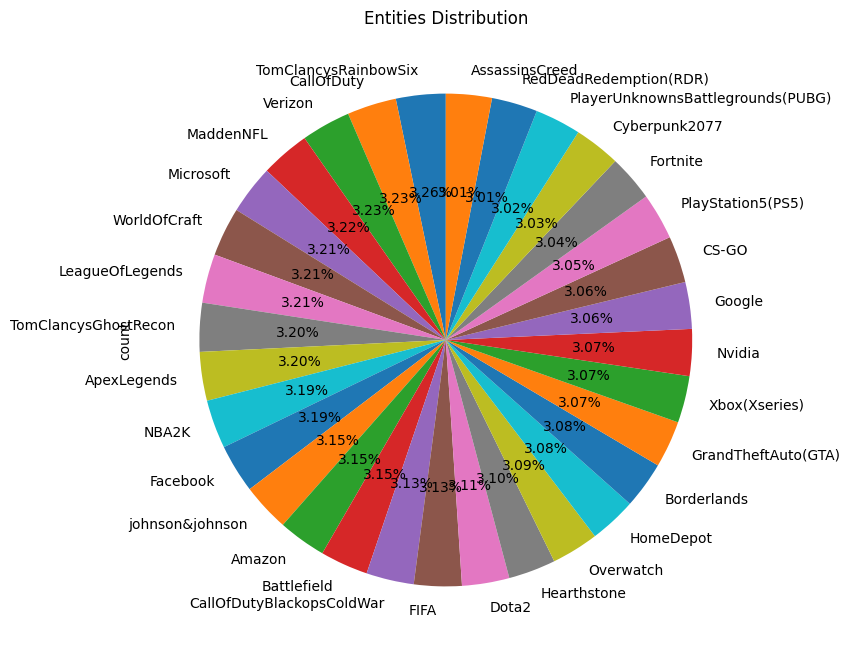

In [16]:
entity_content = twit['Entity'].value_counts()
plt.figure(figsize=(8, 8))
entity_content.plot(kind='pie', autopct='%1.2f%%', startangle=90)
plt.title('Entities Distribution')
plt.show()


<Axes: xlabel='Sentiment'>

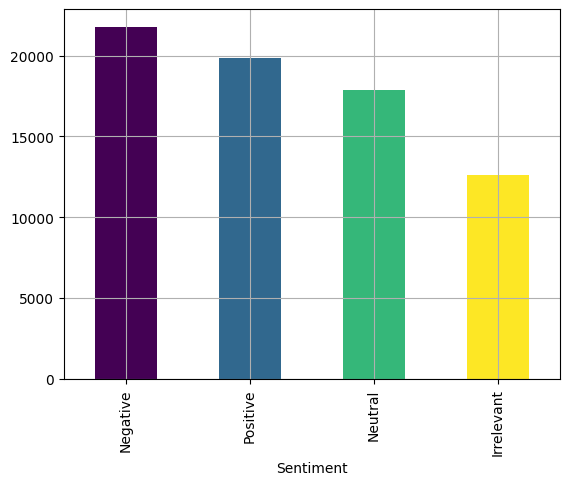

In [18]:
sentiment_content=twit['Sentiment'].value_counts()
color=plt.get_cmap('viridis')
colors = [color(i) for i in np.linspace(0, 1, len(sentiment_content))]
sentiment_content.plot(kind='bar',color=colors,grid=True)

<Axes: xlabel='Entity'>

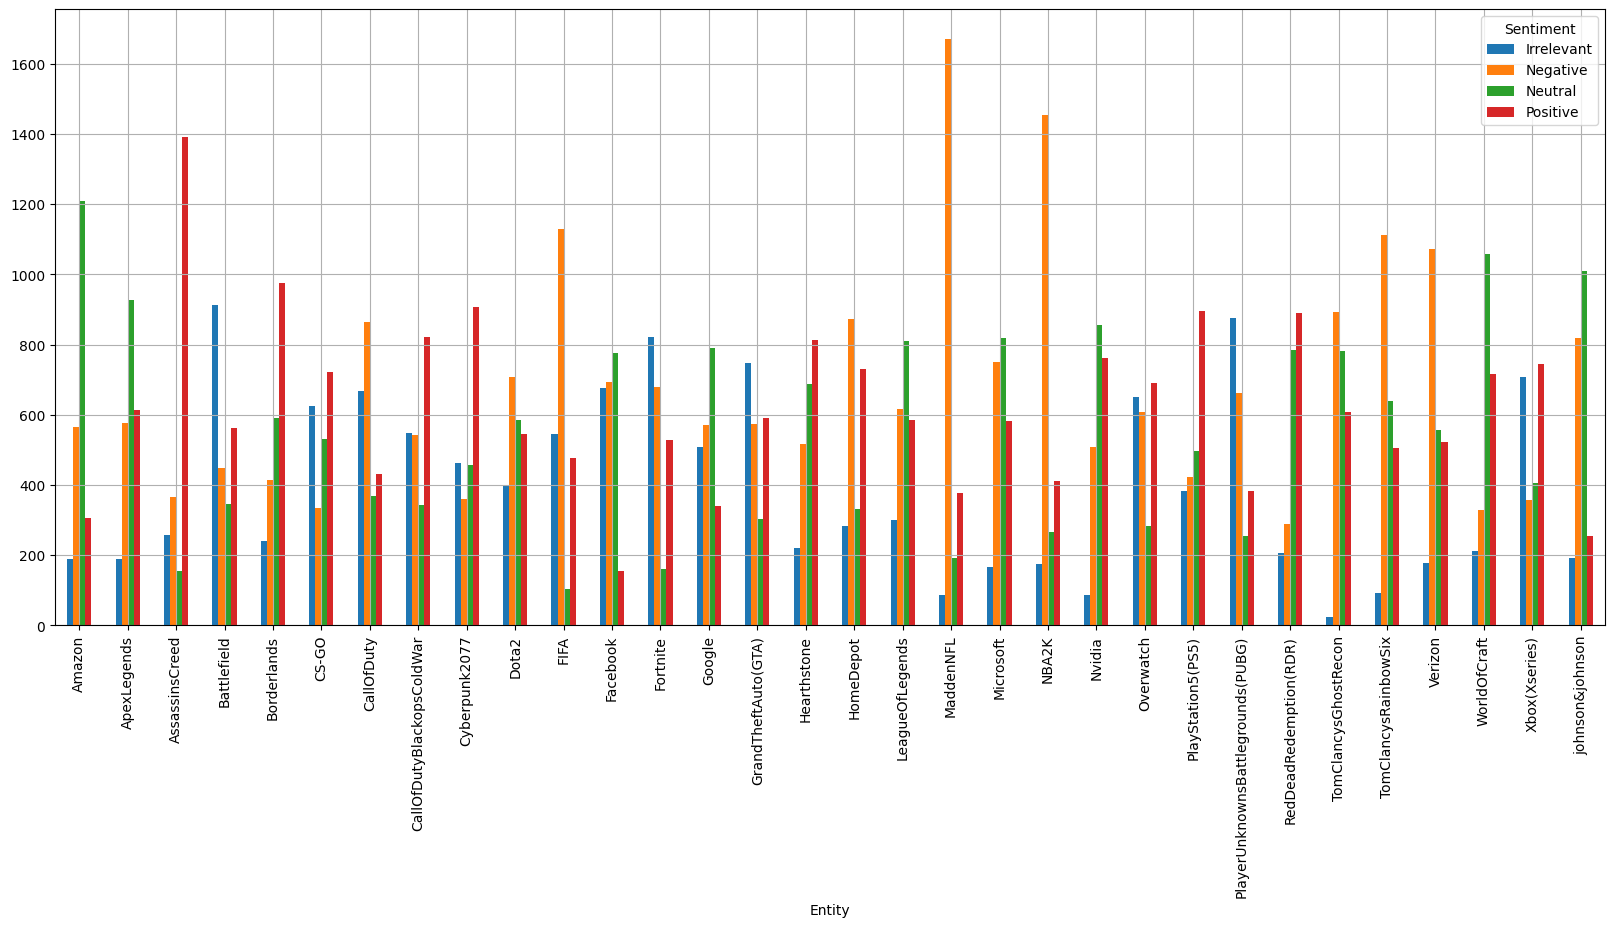

In [20]:
reactions_entities = pd.crosstab(twit['Entity'],twit['Sentiment'])
reactions_entities.plot(kind='bar', figsize=(20, 8),grid=True)

Twitter(Now "X") Users Sentiment Patterns Analysis:

MaddenNFL had the most negative reactions.

AssassinsCreed had the most positive reactions.

Amazon had the most neutral response.

Battlefield had the most irrelevant feedback.